In [25]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('csv/truth_bluff_results.csv')

In [26]:
# Plots the average accuracy across seeds for given infolder and 
# test set (both, truth-only, or bluff-only)
def plot_accuracy_vs_k(infolder='default', include='both'):
    # Isolate based on infolder
    df = data[data['infolder'].str.contains(infolder)]
        
    # Separate modified and unmodified
    hmm = df[df['model'] == 'hmm']
    lstmHmm = df[df['model'] == 'lstmHmm']
    
    # Column to plot
    if include == 'both':
        col = 'percent_correct'
    elif include == 'truth-only':
        col = 'avg_correct_T'
    elif include == 'bluff-only':
        col = 'avg_correct_B'
    else:
        raise ValueError('Invalid entry for include parameter.')
    
    # Set up plot
    fig, ax = plt.subplots()
    plot_title = 'Accuracy vs. k - {} Sequences, '.format(infolder.title())
    if include == 'both': plot_title+='Both T/B' 
    else: plot_title+=include.title()
    plt.title(plot_title)
    plt.xlabel('k - Number of Hidden States')
    plt.ylabel('Classification Accuracy (%)')
    plt.ylim([40,70])
    plt.xlim([3,7])
    plt.xticks([3,4,5,6,7])
    plt.axhline(y=50, linestyle='dashed') # Dashed line at 50%
    
    # Get data
    x = np.array([4,5,6])
    y_hmm = []
    for k, group in hmm.groupby('k'):
        y_hmm.append(group[col].mean())
    y_lstm_hmm = []
    for k, group in lstmHmm.groupby('k'):
        y_lstm_hmm.append(group[col].mean())
    
    # Plot
    ax.bar(x-0.1,y_hmm, 0.2, color='g')
    ax.bar(x+0.1,y_lstm_hmm,0.2, color='b')
    ax.legend(['50%', 'HMM', 'M-HMM'])
    
    file_name = plot_title.replace(' ', '_').replace('/', '+').replace(',', '').replace('.','')
    
    plt.savefig('plots/non_threshold/' + file_name, dpi=256)
    plt.plot()
    

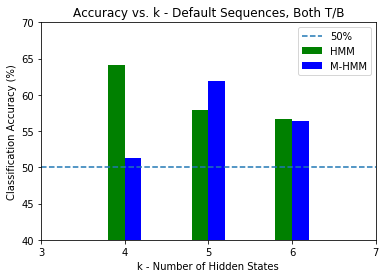

In [27]:
plot_accuracy_vs_k('default')

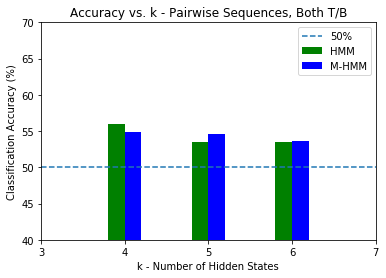

In [28]:
plot_accuracy_vs_k('pairwise')

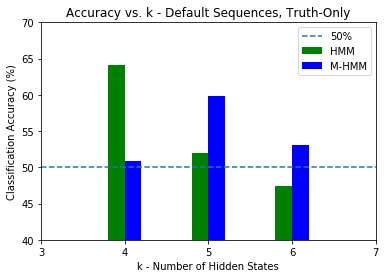

In [29]:
plot_accuracy_vs_k('default', 'truth-only')

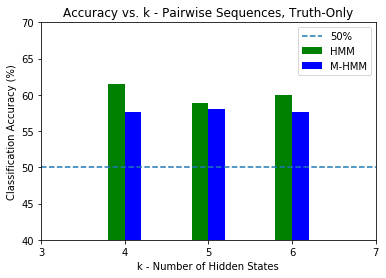

In [30]:
plot_accuracy_vs_k('pairwise', 'truth-only')

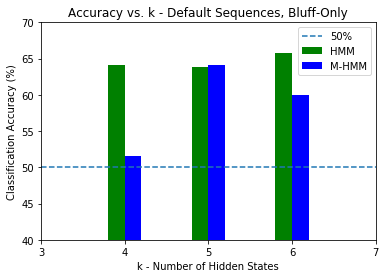

In [31]:
plot_accuracy_vs_k('default', 'bluff-only')

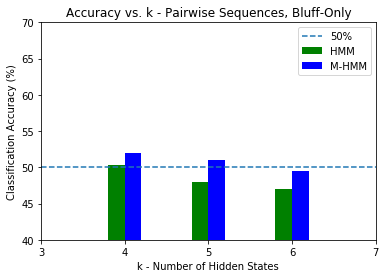

In [32]:
plot_accuracy_vs_k('pairwise', 'bluff-only')

In [33]:
# Count how many seeds were used in each average
for infolder in ['pairwise', 'default']:
    for model in ['hmm', 'lstmHmm']:
        df = data[data['infolder'].str.contains(infolder)]
        df = df[df['model'] == model]
        for k in [4,5,6]:
            df_k = df[df['k'] == k]
            print('{} trials with {} sequences using {} model and k = {}'.\
                  format(len(df_k),infolder,model,k))
        print('')

10 trials with pairwise sequences using hmm model and k = 4
10 trials with pairwise sequences using hmm model and k = 5
10 trials with pairwise sequences using hmm model and k = 6

10 trials with pairwise sequences using lstmHmm model and k = 4
10 trials with pairwise sequences using lstmHmm model and k = 5
10 trials with pairwise sequences using lstmHmm model and k = 6

10 trials with default sequences using hmm model and k = 4
10 trials with default sequences using hmm model and k = 5
10 trials with default sequences using hmm model and k = 6

10 trials with default sequences using lstmHmm model and k = 4
10 trials with default sequences using lstmHmm model and k = 5
10 trials with default sequences using lstmHmm model and k = 6

